# Modelling refolded folds
This tutorial will show you how to use the fold constraints to model multiple generations of folding. The reference model is a type 2 interference pattern and was presented in the 2016 EPSL paper by Gautier Laurent.

## Imports

In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in the data from the provided examples
data, bb = load_laurent2016()

In [3]:
data['coord'] = 0

In [4]:
newdata = pd.DataFrame([[5923.504395,4748.135254,3588.621094,'s2',1.0]],columns=['X','Y','Z','type','val'])
data = pd.concat([data,newdata],sort=False)
data[np.logical_and(data['type'] == 's2',np.isnan(data['nx']))]
data.loc[np.logical_and(data['type'] == 's0',~np.isnan(data['val'])),'type'] = 's01'


In [5]:
rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

### Modelling S2

Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
Not enough constraints for fold frame coordinate 1, 
Add some more and try again.



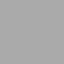

In [6]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000, 
                                     buffer=0.5,
                                    solver='lu',
                                    damp=True)
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2['feature'][0],
                       cmap='prism')
viewer.add_isosurface(s2['feature'][0],
                     slices=[0,1])
viewer.add_data(s2['feature'][0])
viewer.rotate(rotation)
viewer.interactive()
# viewer.display()


### Modelling S1

In [7]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=4, 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.3,
                                            solver='lu'
                                           )



Not enough constraints for structural frame coordinate 1, 
Add some more and try again.
Not enough constraints for fold frame coordinate 1, 
Add some more and try again.


In [8]:
s1['fold'].fold_limb_rotation.rotation_angle

array([-21.24361149, -21.24359339, -21.91252465, -21.91271033,
       -22.34130424, -21.91258689,  -7.76404522,  -1.62074484,
        -5.46320882, -18.35878231, -17.76034599, -17.7605268 ,
       -22.34113625, -21.78623892, -21.78623861, -21.78623892,
       -17.75840236, -20.72989439, -21.78623892, -17.75828176,
       -15.27911987, -21.14341665, -23.4230537 ,  20.24437169,
        -5.94375168, -20.82394275, -15.85781016,  -0.18860516,
       -23.43348577,   9.2360505 , -21.50095577, -20.84907178,
        -0.1883755 ,   3.16496039, -20.82394275, -11.64939261,
        23.36855109, -18.80733523,   5.05673013,  24.22290304,
        22.70182632, -22.70063926,  11.96552288, -22.95983313,
       -15.07060764, -22.34469968, -12.09245753, -12.04160723,
        -1.28947   , -22.34463725, -14.16207176,   0.37952732,
        13.33045781,  11.82930597, -19.54762114,   8.20003627,
       -13.6022187 ,   1.99737373,   8.15009281,   3.82486048,
       -22.95033173,  22.54505751, -21.90621416, -15.24


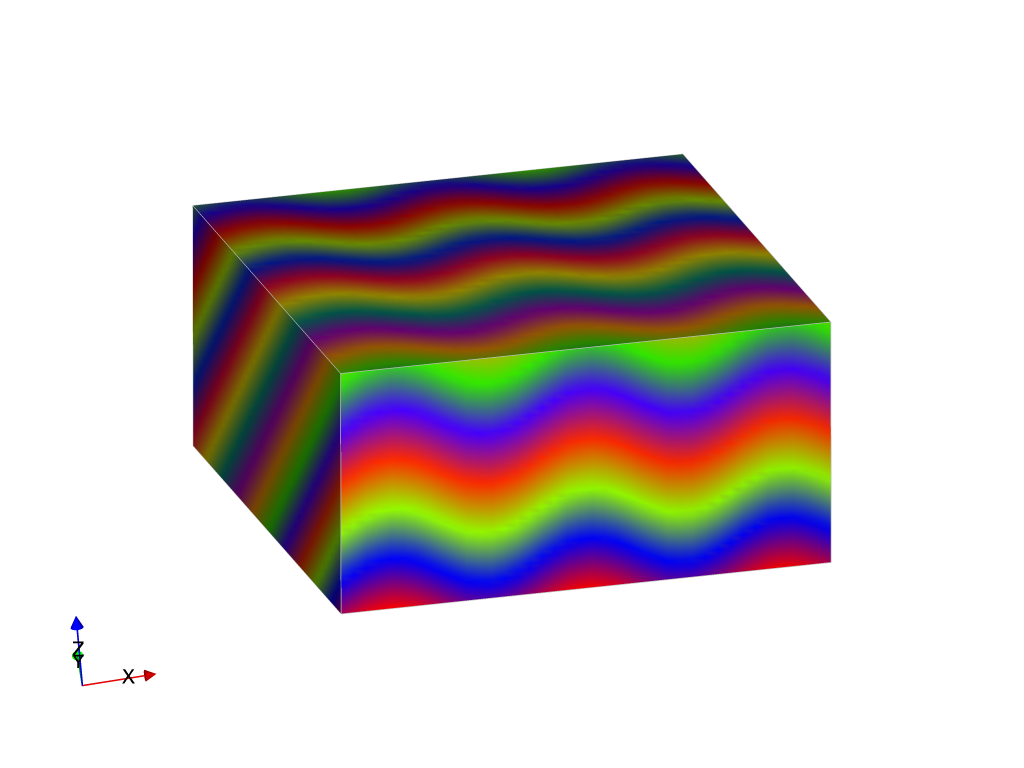

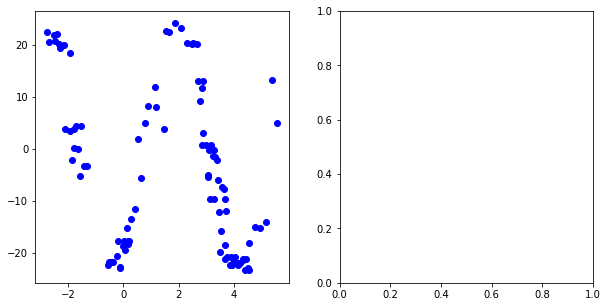

In [9]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1['feature'][0],
                       cmap='prism')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s2['feature'][0].min(),s2['feature'][0].max(),1000)
ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
ax[0].plot(s1['fold'].fold_limb_rotation.fold_frame_coordinate,s1['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

### Modelling S0

In [10]:
s0 = model.create_and_add_folded_foliation('s0',
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.2,
                                            damp=True,
                                           solver='lu'
                                           )


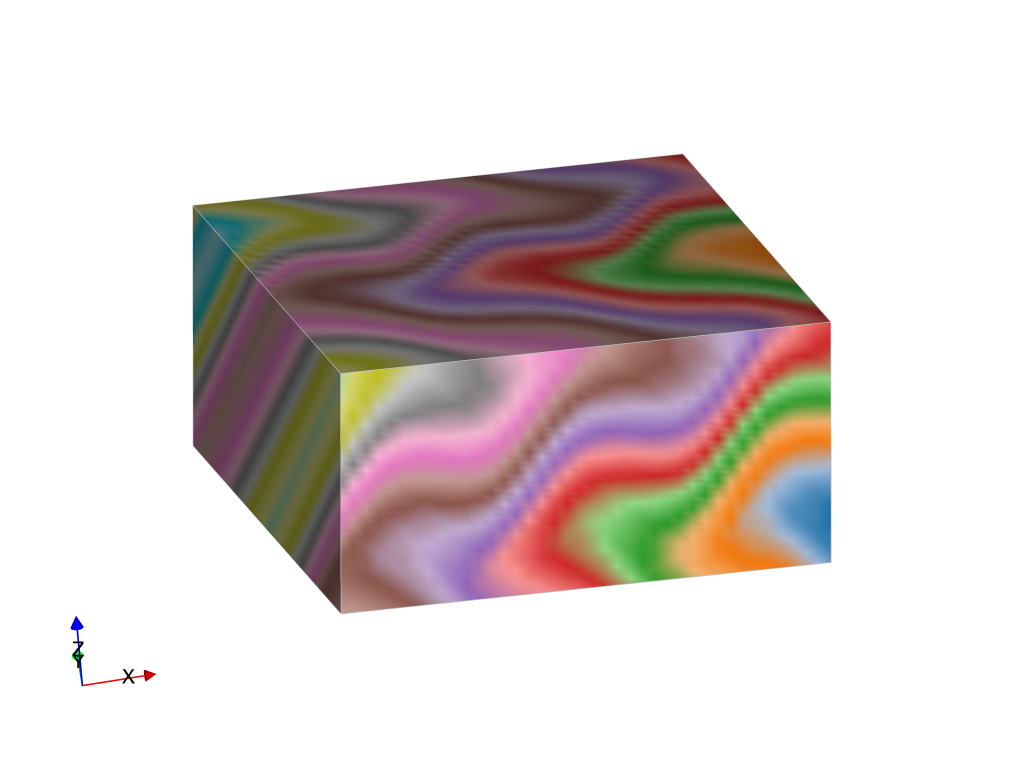

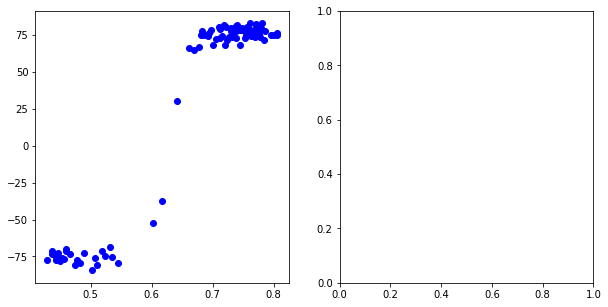

In [11]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0['feature'],
                       cmap='tab20')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s1['feature'][0].min(),s1['feature'][0].max(),1000)
ax[0].plot(s0['fold'].fold_limb_rotation.fold_frame_coordinate,s0['fold'].fold_limb_rotation.rotation_angle,'bo')
# ax[0].plot(s0['foliation'],s0['limb_rotation'],'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')


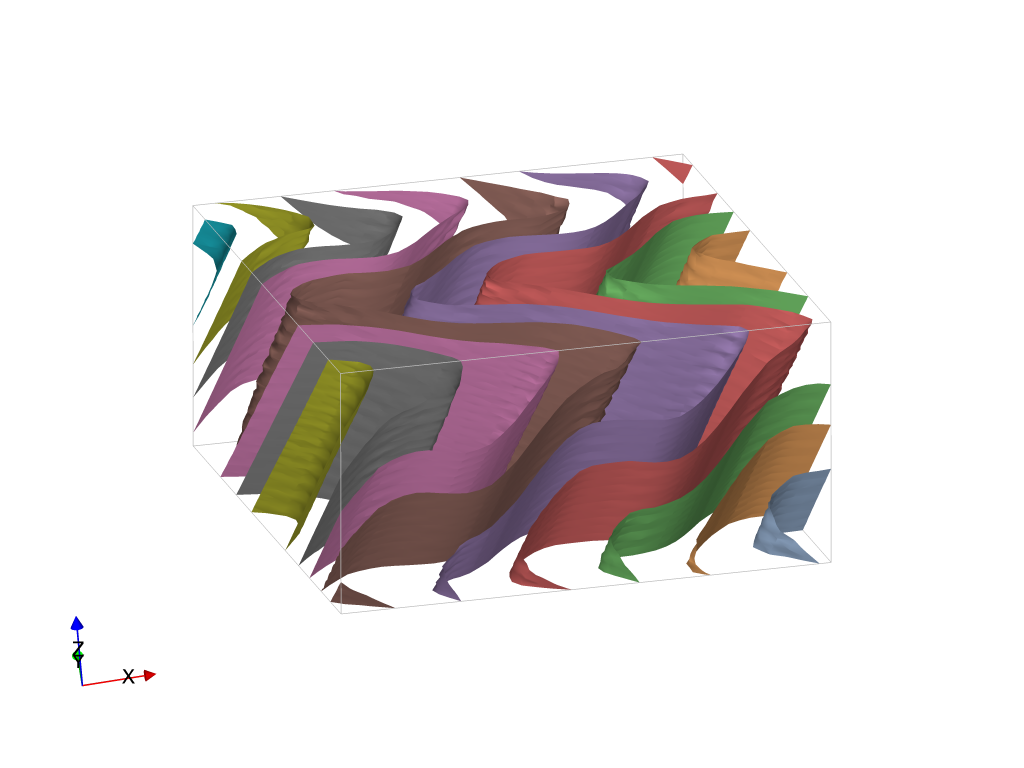

In [12]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(s0['feature'],nslices=10,paint_with=s0['feature'],cmap='tab20')
# viewer.add_data(s0['feature'])
# viewer.add_fold(s0['fold'],locations=s0['support'].barycentre()[::80])
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

In [13]:
stratigraphic_column = {'s0':{'unit1':{'min':0,'max':10,'id':0}}}

In [14]:
model.set_stratigraphic_column(stratigraphic_column)

In [15]:
model.feature_name_index

{'s2': 0, 's1': 1, 's0': 2}


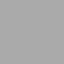

In [16]:
viewer = LavaVuModelViewer(model)
viewer.add_model()
viewer.interactive()

In [17]:
s0['feature'].min()

-0.03294808217370003

In [18]:
s0['feature'].max()

0.01745930921158764

In [8]:
class Test:
    def __init__(self):
        self.name = 'name'
        self.__value = 0
    @property
    def value(self):
        return np.arange(10)#__value
    

In [9]:
t = Test()

In [11]:
t.value

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])